In [1]:
#je vais me connecter à la base de données annonces.db faire des prédictions des prix grace à un modèle de machine learning
#je vais ensuite enregistrer le modèle dans un fichier pour pouvoir l'utiliser plus tard
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import joblib


In [2]:
#je me connecte à la base de données
conn = sqlite3.connect("annonces.db")
#je récupère les données
data = pd.read_sql_query("SELECT * FROM annonces", conn)
#je ferme la connexion
conn.close()

In [3]:

print(data.head())

   id  location  pieces  surface   price  \
0   1        10       1     15.4   740.0   
1   2         8       1     40.0  2000.0   
2   3        16       1     12.0   585.0   
3   4         1       3     73.0  3499.0   
4   5         5       2     38.0  1610.0   

                                         description  
0  Studio refait à neuf très belle prestation rez...  
1  **Idéal étudiant(e)** À 100 m du Parc Monceau,...  
2  **Disponible fin octobre 2024** Studette meubl...  
3  Très bel appartement parisien de 73m2, entière...  
4  **C'est ma résidence principale que je loue pe...  


<Axes: >

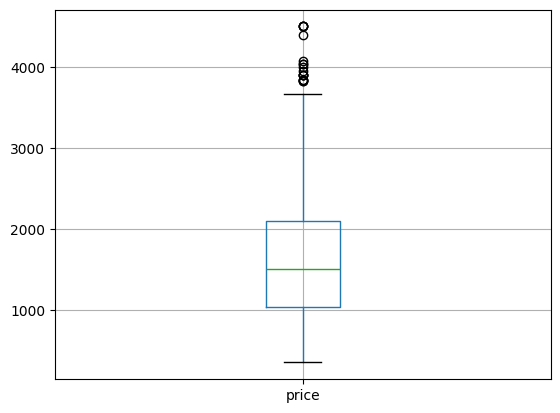

In [4]:
import matplotlib.pyplot as plt
#je crée un boxplot pour voir si il y a des valeurs aberrantes
data.boxplot(column="price")

In [5]:
from sklearn.ensemble import RandomForestRegressor
#les valeurs au dessus de 3600 sont des valeurs aberrantes
#apres plusieurs essais, j'ai décidé de supprimer celle qui sont audessus de 3300 pour le random forest regressor car cela me donnait le plus de précision
#je vais aussi enlever celle qui sont en dessous de 200
# dataForRFR = data[data["price"] > 250]
dataForRFR = data[data["price"] < 3300]
X = dataForRFR[['surface','location','pieces']]
y = dataForRFR['price']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression des forêts aléatoires
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Affichage des résultats
results = pd.DataFrame({'Location': X_test['location'],'Surface': X_test['surface'],  
                        'Prix Réel': y_test, 'Prix Prédit': y_pred})
print(results)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calcul des erreurs
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# MAPE - Erreur moyenne absolue en pourcentage
mape = (abs((y_test - y_pred) / y_test).mean()) * 100

# Affichage des résultats
print(f'Coefficient de détermination (R²): {r2}')
print(f'Erreur quadratique moyenne (MSE): {mse}')
print(f'Racine carrée de l\'erreur quadratique moyenne (RMSE): {rmse}')
print(f'Erreur absolue moyenne (MAE): {mae}')
print(f'Erreur moyenne absolue en pourcentage (MAPE): {mape:.2f}%')

# Enregistrement du modèle
joblib.dump(model, 'RFR_model.pkl')


     Location  Surface  Prix Réel  Prix Prédit
27         14    72.54     2350.0  2340.126714
340        14    37.00     1295.0  1338.050000
79         16    18.00      870.0   885.350000
208         5    38.00     1610.0  1632.970000
61         20    28.60     1225.0  1053.033333
..        ...      ...        ...          ...
275        17    10.50      800.0   674.400000
4           5    38.00     1610.0  1632.970000
83         15    69.00     2490.0  2473.500000
257        18    47.00     1900.0  1489.340000
65         12    52.00     1690.0  1948.080000

[67 rows x 4 columns]
Coefficient de détermination (R²): 0.9000840964273804
Erreur quadratique moyenne (MSE): 44649.215011910244
Racine carrée de l'erreur quadratique moyenne (RMSE): 211.30360861071503
Erreur absolue moyenne (MAE): 140.1500592276712
Erreur moyenne absolue en pourcentage (MAPE): 10.71%


['RFR_model.pkl']

In [6]:
#je vais le faire avec un modèle de régression linéaire
#je vais créer un modèle de régression linéaire
model = LinearRegression()
#pour le model de régression linéaire, j'ai décidé de supprimer les valeurs au dessus de 3800
# dataForLR = data[data["price"] > 250]
dataForLR = data[data["price"] < 3800]
X = dataForLR[['surface','location','pieces']]
y = dataForLR['price']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#je vais entrainer mon modèle
model.fit(X_train, y_train)
#je vais faire des prédictions
y_pred = model.predict(X_test)
#je vais afficher les résultats
results = pd.DataFrame({'Location': X_test['location'],'Surface': X_test['surface'], 
                        'Prix Réel': y_test, 'Prix Prédit': y_pred})
print(results)
#je vais calculer les erreurs
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#je vais afficher les résultats
print(f'Coefficient de détermination (R²): {r2}')
print(f'Erreur quadratique moyenne (MSE): {mse}')
print(f'Racine carrée de l\'erreur quadratique moyenne (RMSE): {rmse}')
print(f'Erreur absolue moyenne (MAE): {mae}')


     Location  Surface  Prix Réel  Prix Prédit
49         16     65.0     2500.0  2177.371686
173        17     44.0     1600.0  1605.343167
60         13     40.0     1360.0  1564.215915
26         11     37.0     1600.0  1531.028241
121        11     50.0     1600.0  1888.289965
..        ...      ...        ...          ...
269        12     25.0     1200.0  1146.904273
7           4     43.0     2400.0  1868.318953
346        18     12.0      750.0   641.870532
96         19     38.0     1480.0  1361.480557
317        18     38.0     1330.0  1386.109226

[68 rows x 4 columns]
Coefficient de détermination (R²): 0.8651786913513375
Erreur quadratique moyenne (MSE): 61545.29994254304
Racine carrée de l'erreur quadratique moyenne (RMSE): 248.08325203959868
Erreur absolue moyenne (MAE): 188.05609355439782


In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#pour le modèle de régression par perceptron multicouche, j'ai décidé de supprimer les valeurs au dessus de 3800
# dataForLR = data[data["price"] > 250]
dataForMLPR = data[data["price"] < 3800]
X = dataForMLPR[['surface','location','pieces']]
y = dataForMLPR['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle avec des hyperparamètres ajustés
model = MLPRegressor(hidden_layer_sizes=(96, 64, 32), max_iter=1000, random_state=42)

# Entraînement du modèle
model.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model.predict(X_test_scaled)

# Affichage des résultats
results = pd.DataFrame({'Location': X_test['location'], 'Surface': X_test['surface'], 
                        'Prix Réel': y_test, 'Prix Prédit': y_pred})
print(results)

# Calcul des erreurs
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f'Coefficient de détermination (R²): {r2}')
print(f'Erreur quadratique moyenne (MSE): {mse}')
print(f'Racine carrée de l\'erreur quadratique moyenne (RMSE): {rmse}')
print(f'Erreur absolue moyenne (MAE): {mae}')




     Location  Surface  Prix Réel  Prix Prédit
49         16     65.0     2500.0  2211.947454
173        17     44.0     1600.0  1591.116252
60         13     40.0     1360.0  1560.111099
26         11     37.0     1600.0  1495.233600
121        11     50.0     1600.0  1867.288385
..        ...      ...        ...          ...
269        12     25.0     1200.0  1058.044236
7           4     43.0     2400.0  1952.577303
346        18     12.0      750.0   733.663799
96         19     38.0     1480.0  1429.310984
317        18     38.0     1330.0  1438.120228

[68 rows x 4 columns]
Coefficient de détermination (R²): 0.8811468438625822
Erreur quadratique moyenne (MSE): 54255.91263661005
Racine carrée de l'erreur quadratique moyenne (RMSE): 232.92898625248438
Erreur absolue moyenne (MAE): 180.14999135798843
